In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system


# 0. Prepare inputs

In [17]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

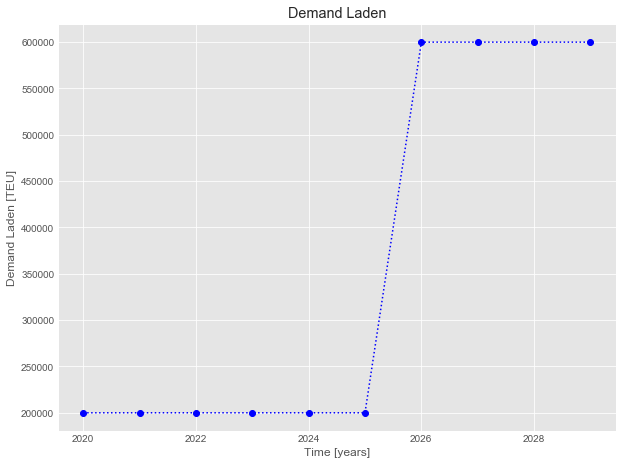

In [18]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.laden_data['historic_data'] = []
laden = container_objects.Commodity(**container_defaults.laden_data)
laden.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [laden]


# plot scenarios 
if True:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [19]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [20]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=False,
                         crane_type_defaults=container_defaults.sts_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [21]:
Terminal.simulate()

PV: [-2.59335840e+07 -6.04587272e+07  9.24462343e+07  9.33487215e+07
  9.41433839e+07  9.01428526e+07  2.54104220e+08  2.44545103e+08
  2.91021598e+08  2.92094293e+08]
NPV: 1365454095.1823363


## Report all elements

In [22]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

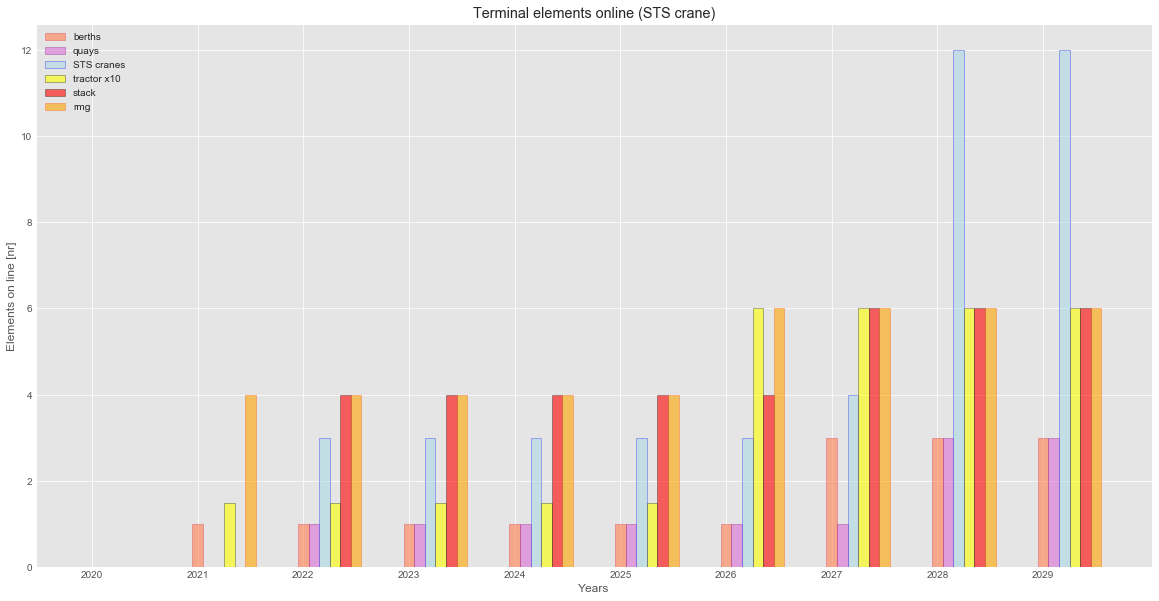

In [23]:
Terminal.terminal_elements_plot()

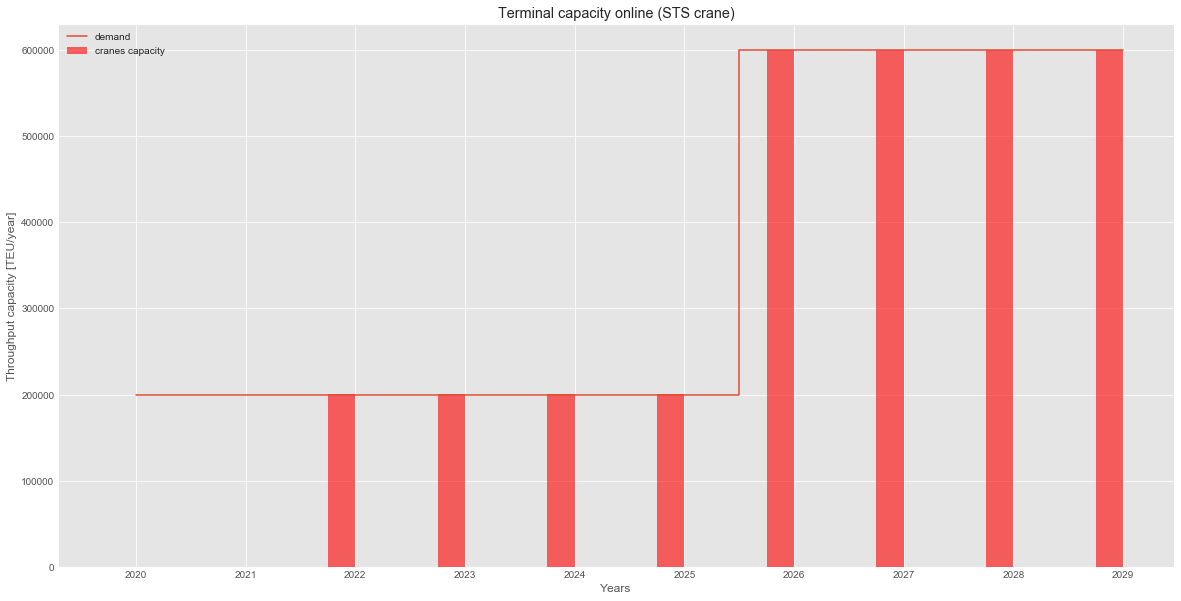

In [24]:
Terminal.terminal_capacity_plot()

In [25]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

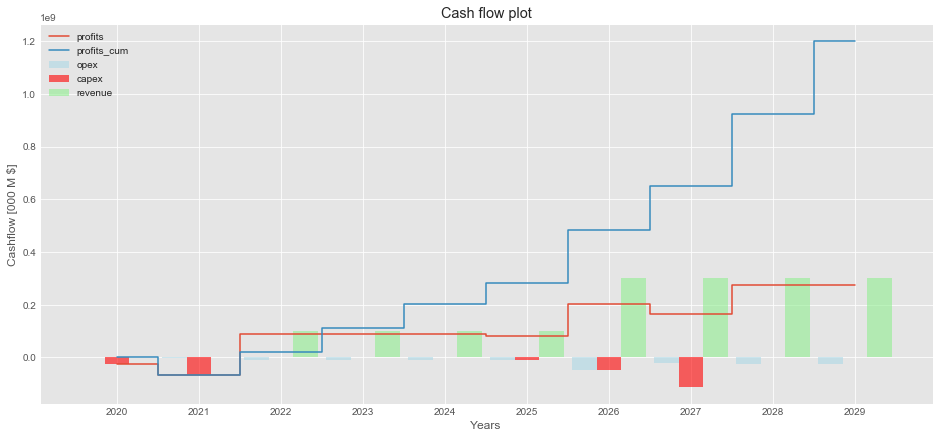

In [26]:
Terminal.cashflow_plot(cash_flows)

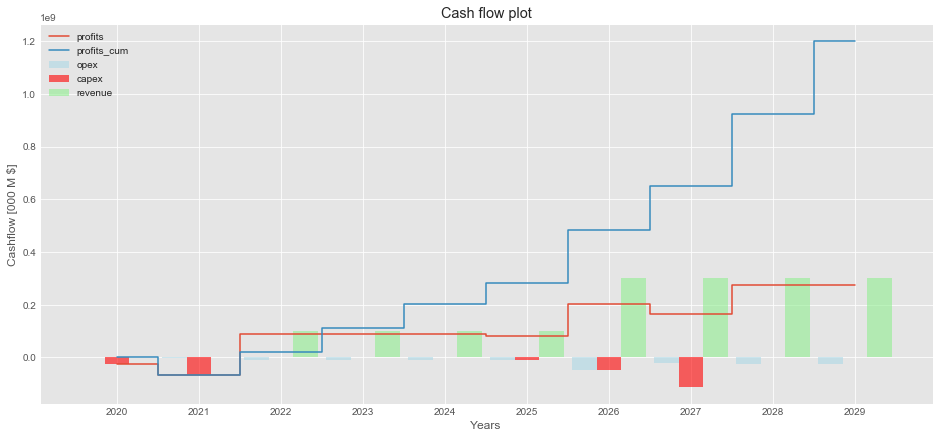

In [27]:
plt.style.use('ggplot')
Terminal.cashflow_plot(cash_flows)

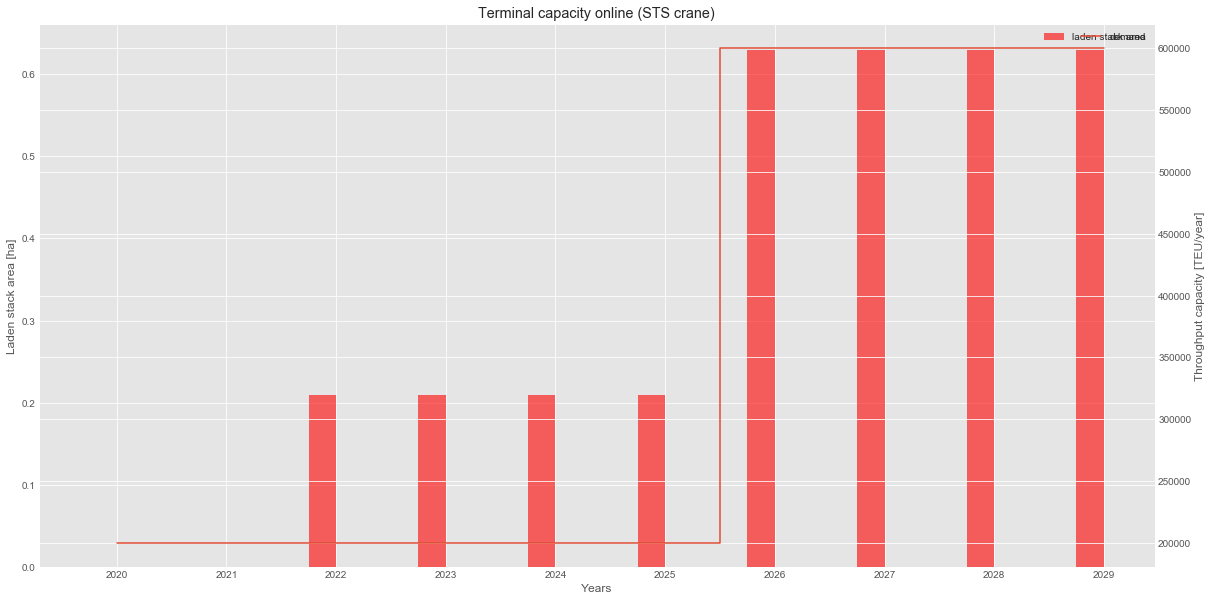

In [28]:
Terminal.laden_stack_area_plot()


## SandBox

In [29]:
Terminal.NPV()

PV: [-2.59335840e+07 -6.04587272e+07  9.24462343e+07  9.33487215e+07
  9.41433839e+07  9.01428526e+07  2.54104220e+08  2.44545103e+08
  2.91021598e+08  2.92094293e+08]
NPV: 1365454095.1823363
